In [1]:
# Import Neccessary libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#Import Sampler libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("diabetes_prediction_dataset.csv")

In [3]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
df.isnull()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False


In [7]:
dup = df[df.duplicated()]
dup

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80.0,0,0,No Info,27.32,6.6,159,0
3272,Female,80.0,0,0,No Info,27.32,3.5,80,0
3418,Female,19.0,0,0,No Info,27.32,6.5,100,0
3939,Female,78.0,1,0,former,27.32,3.5,130,0
3960,Male,47.0,0,0,No Info,27.32,6.0,200,0
...,...,...,...,...,...,...,...,...,...
99980,Female,52.0,0,0,never,27.32,6.1,145,0
99985,Male,25.0,0,0,No Info,27.32,5.8,145,0
99989,Female,26.0,0,0,No Info,27.32,5.0,158,0
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0


In [8]:
df = df.drop_duplicates()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


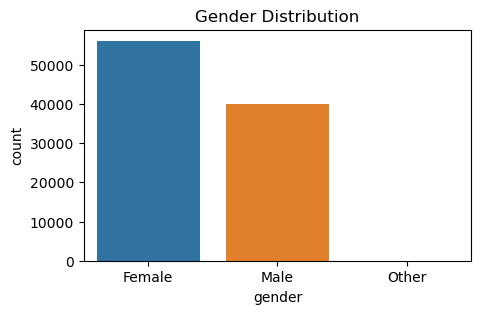

In [10]:
# Bar plot for gender
plt.figure(figsize=(5, 3))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

In [11]:
df = df[df['gender'] != 'Other']

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96128 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96128 non-null  object 
 1   age                  96128 non-null  float64
 2   hypertension         96128 non-null  int64  
 3   heart_disease        96128 non-null  int64  
 4   smoking_history      96128 non-null  object 
 5   bmi                  96128 non-null  float64
 6   HbA1c_level          96128 non-null  float64
 7   blood_glucose_level  96128 non-null  int64  
 8   diabetes             96128 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


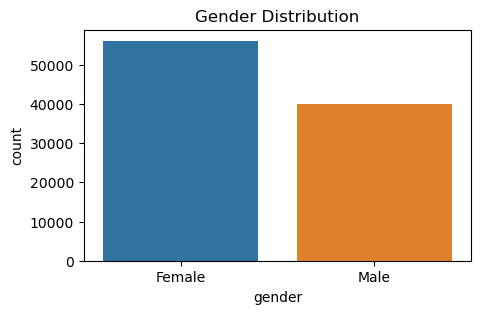

In [13]:
# Bar plot for gender
plt.figure(figsize=(5, 3))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

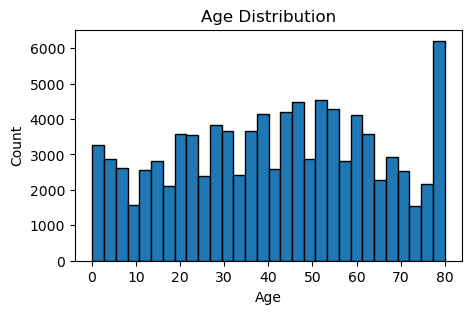

In [14]:
# Histogram for age
plt.figure(figsize=(5, 3))
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

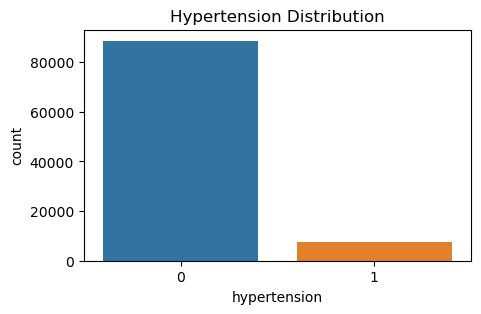

In [15]:
# Bar plot for Hypertension
plt.figure(figsize=(5, 3))
sns.countplot(x='hypertension', data=df)
plt.title('Hypertension Distribution')
plt.show()

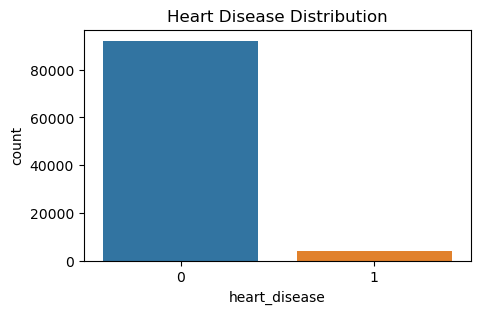

In [16]:
# Bar plot for Heart Disease
plt.figure(figsize=(5, 3))
sns.countplot(x='heart_disease', data=df)
plt.title('Heart Disease Distribution')
plt.show()

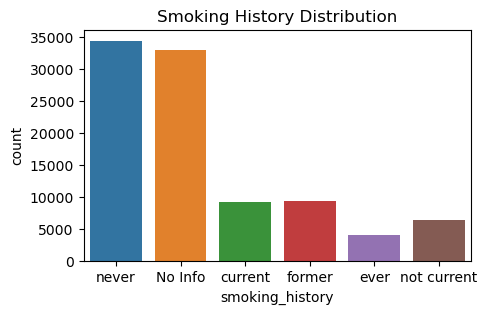

In [17]:
# Count plot for smoking history
plt.figure(figsize=(5, 3))
sns.countplot(x='smoking_history', data=df)
plt.title('Smoking History Distribution')
plt.show()

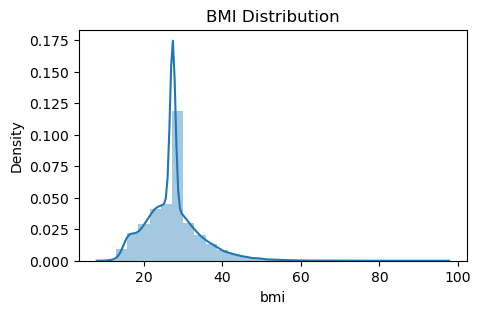

In [18]:
# Distribution plot for BMI
plt.figure(figsize=(5, 3))
sns.distplot(df['bmi'], bins=30)
plt.title('BMI Distribution')
plt.show()

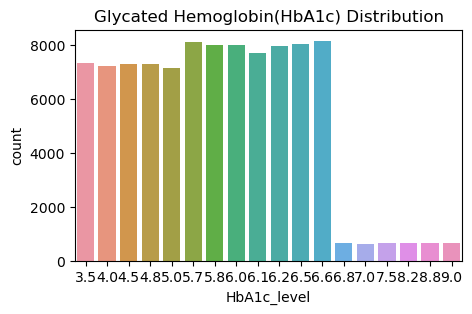

In [19]:
# Bar plot for HbA1c
plt.figure(figsize=(5, 3))
sns.countplot(x='HbA1c_level', data=df)
plt.title('Glycated Hemoglobin(HbA1c) Distribution')
plt.show()

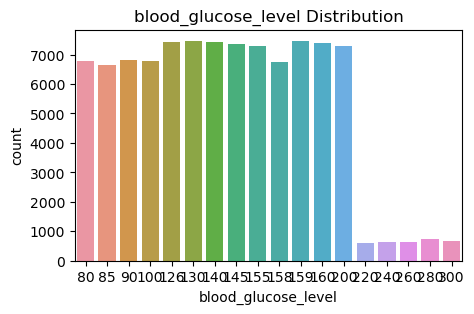

In [20]:
# Bar plot for blood_glucose_level
plt.figure(figsize=(5, 3))
sns.countplot(x='blood_glucose_level', data=df)
plt.title('blood_glucose_level Distribution')
plt.show()

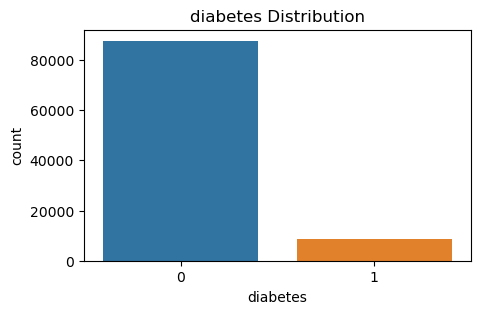

In [21]:
# Bar plot for diabetes
plt.figure(figsize=(5, 3))
sns.countplot(x='diabetes', data=df)
plt.title('diabetes Distribution')
plt.show()

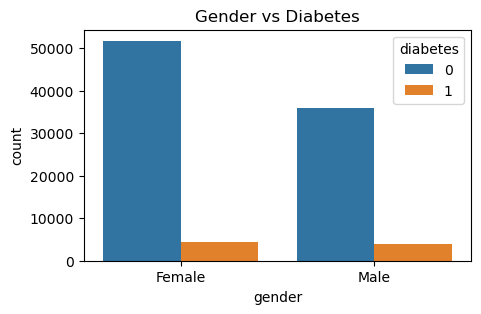

In [22]:
# Count plot of gender vs diabetes
plt.figure(figsize=(5, 3))
sns.countplot(x='gender', hue='diabetes', data=df)
plt.title('Gender vs Diabetes')
plt.show()

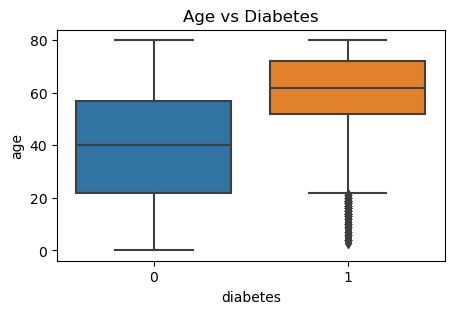

In [23]:
# Boxplot Age vs Diabetes classification
plt.figure(figsize=(5, 3))
sns.boxplot(x='diabetes', y='age', data=df)
plt.title('Age vs Diabetes')
plt.show()

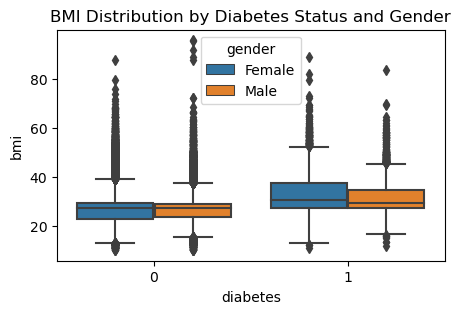

In [24]:
# Interaction between gender, BMI and diabetes
plt.figure(figsize=(5, 3))
sns.boxplot(x='diabetes', y='bmi', hue='gender', data=df)
plt.title('BMI Distribution by Diabetes Status and Gender')
plt.show()

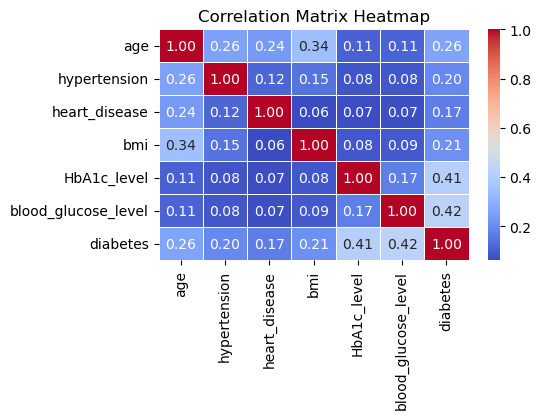

In [25]:
# Compute the correlation matrix
correlation_matrix = df.drop(["gender", "smoking_history"], axis=1).corr()

# Graph
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()



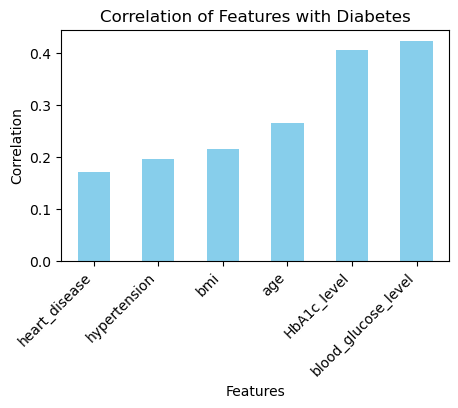

In [26]:
# Extract correlation values of features with "diabetes"
diabetes_correlation = correlation_matrix["diabetes"].drop(["diabetes"])

# Plot
plt.figure(figsize=(5, 3))
diabetes_correlation.sort_values().plot(kind='bar', color='skyblue')
plt.title("Correlation of Features with Diabetes")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.xticks(rotation=45, ha='right')
plt.show()


In [27]:
# Define resampling
resampling = imbPipeline([
    ('over', SMOTE(sampling_strategy=0.1)),
    ('under', RandomUnderSampler(sampling_strategy=0.5))
])

In [28]:
# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','hypertension','heart_disease']),
        ('cat', OneHotEncoder(), ['gender','smoking_history'])
    ])


# Split data into features and target variable
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

In [31]:
# Perform cross-validation for each classifier
for name, clf in classifiers.items():
    pipeline = make_imb_pipeline(
        preprocessor,
        resampling.named_steps['over'],  
        resampling.named_steps['under'],
        clf
    )
    
    # Evaluate using cross-validation
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    
    # Print results
    print(f"Classifier: {name}")
    print(f"Mean Accuracy: {scores.mean():.4f}")
    print(f"Standard Deviation of Accuracy: {scores.std():.4f}")
    print()


Classifier: Logistic Regression
Mean Accuracy: 0.9254
Standard Deviation of Accuracy: 0.0025

Classifier: Decision Tree
Mean Accuracy: 0.9065
Standard Deviation of Accuracy: 0.0022

Classifier: Support Vector Machine
Mean Accuracy: 0.9381
Standard Deviation of Accuracy: 0.0019

Classifier: Random Forest
Mean Accuracy: 0.9374
Standard Deviation of Accuracy: 0.0019

Classifier: XGBoost
Mean Accuracy: 0.9362
Standard Deviation of Accuracy: 0.0018



In [32]:
# Loop through classifiers
for name, clf in classifiers.items():
    pipeline = imbPipeline([
        ('preprocessor', preprocessor),
        ('resampling', resampling.named_steps['over']),  
        ('undersampling', resampling.named_steps['under']),  
        ('classifier', clf)
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = pipeline.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    classification_report_output = classification_report(y_test, y_pred)
    confusion_matrix_output = confusion_matrix(y_test, y_pred)
    
    # Print results
    print(f"Classifier: {name}")
    print(f"Accuracy on train data : {pipeline.score(X_train, y_train):.4f}")
    print(f"Accuracy on test data : {accuracy:.4f}")
    print("Classification Report:\n", classification_report_output)
    print("Confusion Matrix:\n", confusion_matrix_output)
    print("--------------------------------------------------------------------------------------------------------------------")


Classifier: Logistic Regression
Accuracy on train data : 0.9252
Accuracy on test data : 0.9233
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96     17525
           1       0.55      0.80      0.65      1701

    accuracy                           0.92     19226
   macro avg       0.76      0.87      0.80     19226
weighted avg       0.94      0.92      0.93     19226

Confusion Matrix:
 [[16398  1127]
 [  347  1354]]
--------------------------------------------------------------------------------------------------------------------
Classifier: Decision Tree
Accuracy on train data : 0.9359
Accuracy on test data : 0.9058
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.91      0.95     17525
           1       0.48      0.82      0.61      1701

    accuracy                           0.91     19226
   macro avg       0.73      0.87      0.78     19226
we